K Means Optimisation


In [6]:
%pylab
%matplotlib inline

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\emi28\anaconda3\envs\environment\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [7]:
import numpy
import math
import random
import operator
from PIL import Image

In [26]:
def normalize(data):
    xmin = min(min(data)) 
    xmax = max(max(data))
    for i in range(len(data)):
        sublist = data[i]
        sublist[0] = sublist[0]*0.7
        sublist[1] = sublist[1]*0.7
        for p in range(len(sublist)):
            data[i][p] = (sublist[p]-xmin) / (xmax-xmin)
    return data

In [9]:
def getPositions(img):
    width, height = img.size
    i = 0
    j = 0
    positions = []
    for i in range(width):
        for j in range(height):
            list_positions = []
            coordinate = i, j
            list_positions.append(i)
            list_positions.append(j)
            for p in range(len(img.getpixel(coordinate))):
                list_positions.append(img.getpixel(coordinate)[p])
            positions.append(list_positions)
    return positions

In [10]:

def calculate_distance(a,b):

    a = numpy.array(a)
    b = numpy.array(b)
    distance_vector = a - b
    distance = numpy.sqrt(sum(distance_vector**2))
    return distance

def calculate_distance2(a,b):

    a_positions = numpy.array(a[0])
    b_positions = numpy.array(b[0])
    a_rgb = numpy.array(a[1])
    b_rgb = numpy.array(b[1])
    distance_vector_positions = a_positions - b_positions
    distance_vector_rgb = a_rgb - b_rgb
    distance_vector = numpy.concatenate([distance_vector_positions, distance_vector_rgb])
    distance = numpy.sqrt(sum(distance_vector**2))
    return distance

def initiate_centroids(K,image):
    imagePixels = normalize(getPositions(image))
    initial_centers = list()
    for x in range(K):
        initial_centers.append(imagePixels[random.randint(0,len(imagePixels)-1)])
    return initial_centers

def findClosestCentroids(centroids, image):
    
    imagePixels = normalize(getPositions(image))
    assigned_centroid = []
    for p in imagePixels:
        distance = []
        for c in centroids:
            distance.append(calculate_distance(c, p))
        assigned_centroid.append(numpy.argmin(distance))
    return assigned_centroid

In [11]:
def getPositions2(img):
    width, height = img.size
    i = 0
    j = 0
    positions = []
    for i in range(width):
        for j in range(height):
            coordinate = i, j
            positions.append([i, j, img.getpixel(coordinate)])
    return positions

Unify centroid list and responsibility / only create responsibility matrix in the format  x*k*d (x = number of pixels, k = number of centroids, d = dimensions) as numpy array or list

In [12]:
def responsibility(centroids, image):
    imagePixels = normalize(getPositions(image))

    x = len(imagePixels)

    k = len(centroids)

    d = len(centroids[0])

    matrix = numpy.zeros((x,k,d))

    for p in range(x):

        distance = []

        for c in centroids:

            distance.append(calculate_distance(imagePixels[p], c))
        
        matrix[p,numpy.argmin(distance)] = [1]*d
    return matrix
        


Cluster means using the new responsibility matrix

In [13]:
def clustermeans(responsibility, image):

    Pixelarray = numpy.array(normalize(getPositions(image)))

    clusters = len(responsibility[1])
    
    new_centroids = []

    for k in range(clusters):
        new_centroids.append(list(sum(responsibility[:,k] * Pixelarray, axis = 0)/sum(responsibility[:,k,0])))
    return new_centroids

K Means V2

In [14]:
def k_means2(image, K, iterations):
    
    centroids = initiate_centroids(K, image)

    new_centroids = []
    
    i = 0

    while i < iterations:  # Maximum of 6 iterations

        resmat = responsibility(centroids,image) 

        new_centroids = clustermeans(resmat, image) # New Centroids

        if new_centroids == centroids:  # End algortihm, if centroids don't change
            break
        
        centroids = new_centroids

        i += 1
        
    final_assignment = findClosestCentroids(centroids, image)



    rgb_array = numpy.array([[255,255,255]]*len(final_assignment))
    for i in range(3):
        rgb_array[:,i] = rgb_array[:,i]*final_assignment/max(final_assignment)
    rgb_array
    rgb_list = []
    for i in range(len(rgb_array)):
        rgb_list.append(tuple(rgb_array[i]))
    image_out = Image.new("RGB",image.size)
    image_out.putdata(rgb_list)
    image_out

    return image_out  # Assignment list can be used to create picture


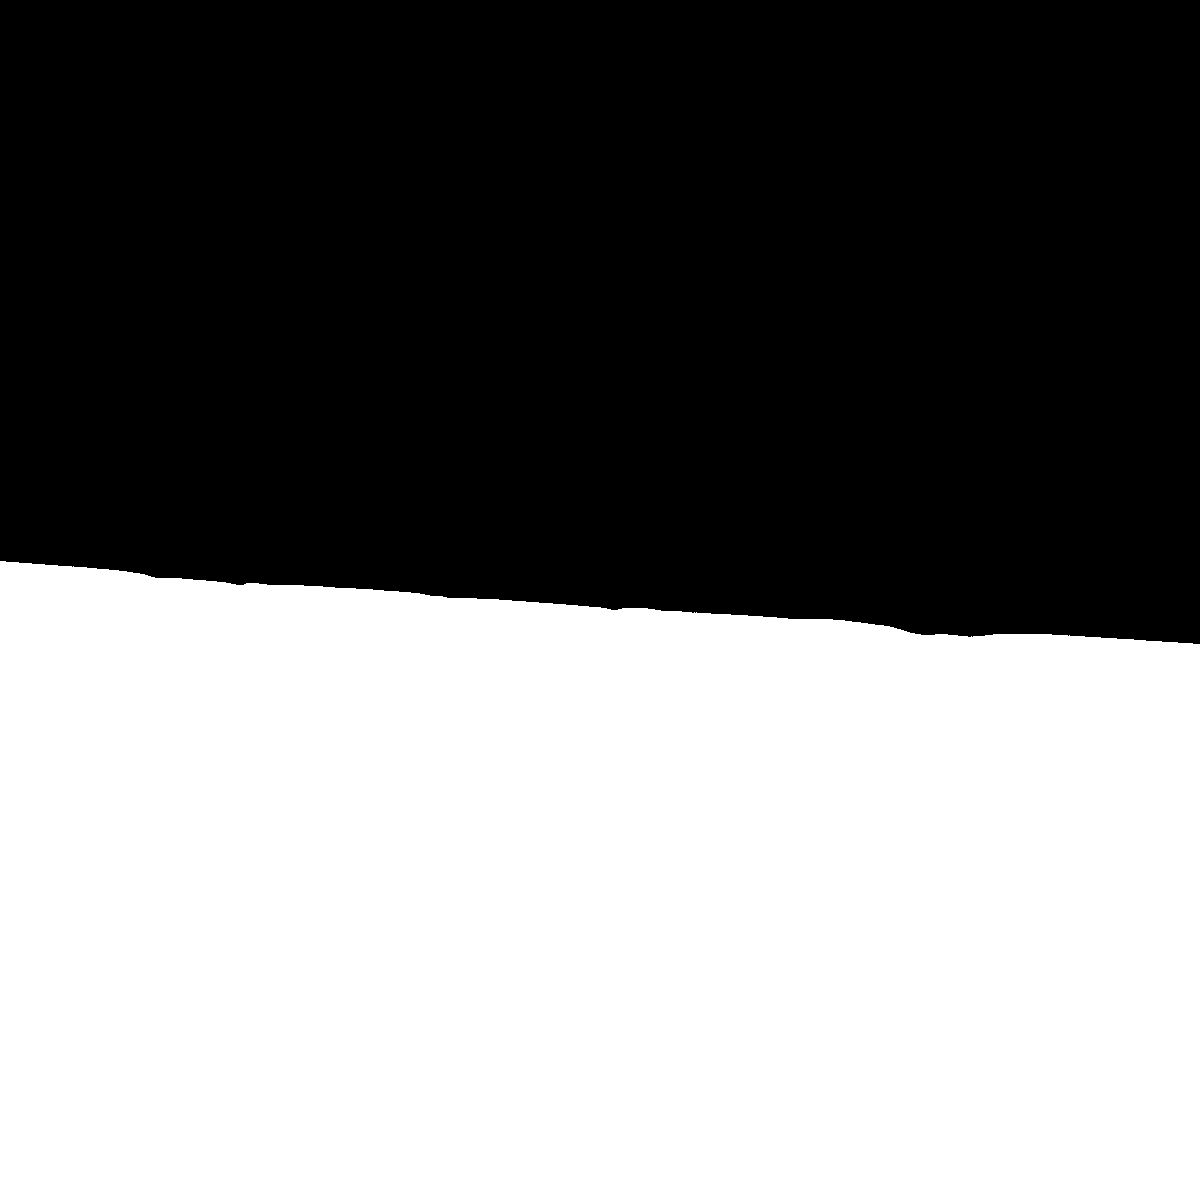

In [28]:
image = Image.open("../data/Yeast_Cells.jpg",'r')


segmented_image = k_means2(image, 2, 5)
segmented_image.save('../data/test_out2.png')
segmented_image # still somewhat inconsistent